# Model Project - DYE code
# Overlapping Generations Model
## 1. Household optimization and Intertemporal budget constraint
We assume that the consumer has access to a competitive financial market, thus they are able to borrow or save at interest rate $r$. The utility of a houseehold over two periods (the household life-time utility) is given by the following time-additive utility function:

$$U=u(c_1)+\delta u(c_2),\quad u'>0,\quad u''<0,\quad 0<\delta\leq1$$

$c_1$ is consumption in period 1 and $c_2$ is the corresponding in period 2. $\delta\equiv\frac{1}{1-\rho}$ captures the preference between consumption in period 1 and 2. $\rho$ is called the *rate of time prefference* and captures the households impacience. Note that the utility of consumption in period 2 is discounted by $\delta$.

For this project, we will use the Constant-Relative Risk Aversion (CRRA) utility function of the form:

$$
\begin{equation}
u\left(c_{t}\right)=\begin{cases}
\frac{c^{1-\alpha}}{1-\alpha}, & \text{if } \alpha>0 \text{ and } \alpha \neq 1 \\
ln\left(c\right) & \text{if } \alpha=1
\end{cases}
\end{equation}
$$

We assume initial endowments in period 1 and 2, $e_1$ and $e_2$. One can think of $e_1$ as an income from period $t=0$ and $e_2$ as income from $t=1$. Given endowments in period 1, $e_1$ and period 2, $e_2$, households maximize their life-time utility, subject to their intertemporal budget constraint

$$\underset{c_1,c_2}{\text{max}}\quad u(c_1)+\delta u(c_2)$$

$$s.t.\quad c_1 + \frac{c_2}{1+r}  = e_1 + \frac{e_2}{1+r} $$

The first order condition is as follows:

$${c_1^*}^{-\alpha} = \delta (1+r) {c_2^*}^{-\alpha}$$

$$\Leftrightarrow c_2^* = \left [\delta (1+r) \right]^\frac{1}{\alpha}c_1^* $$

From the budget constraint we have:

$$c_2^* = E[e](1+r)-c_1^*(1+r),\quad E[e] \equiv e_1 + \frac{e_2}{1+r}$$

Solving for $c_1^*$ (from the FOC and this binding budget):

$$c_1^*  = \frac{E[e]}{1+\frac{\left [\delta (1+r) \right]^\frac{1}{\alpha}}{1+r}}$$

## 2. Defining model in python
We will now define the above model in python before continuing to our analysis. Defining the model beforehand, will ensure a clean structure and make the analysis easier to interpret, without too much code mixed into the analysis itself. We start off as usual, by importing the necessary packages for this analysis.

In [1]:
#Import Packages
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact, fixed

Now, we define the model described as above.

In [2]:
# Define the Constant-Relative Risk Aversion (CRRA) utility function
def u(c, alpha):
    return (1/alpha)* c**(1-alpha)

# Define the households life-time utility
def U(c1, c2, alpha, delta):
    return u(c1, alpha) + delta*u(c2, alpha)

# Define the budget constraint
def bud_cons(c1, r, e1, e2):
    e = e1 + e2/(1+r) # total endowment
    return e*(1+r) - c1*(1+r)

# Define the indifference curve
def indif_curve(c1, ubar, alpha, delta):
    return  ( ((1-alpha)/delta)*(ubar - u(c1, alpha)) )**(1/(1-alpha))

Define a function for solving the model:

In [3]:
def solve_opt(r, alpha, delta, e1, e2):
    """This function solves the model by defining the first order condition and returning consumption in both periods as well as the life-time utility"""
    e = e1 + e2/(1+r)
    A = (delta*(1+r))**(1/alpha)
    c1 = e/(1+A/(1+r))
    c2 = c1*A
    u = U(c1, c2, alpha, delta)
    return c1, c2, u

## 3. Preparing function for plotting
The last step before making the analysis, is to prepare a function, that can plot the model for later use.
We start by defining a set of pre-defined parameters and then continue to build a function.

In [4]:
# Predefined parameters
alpha = 0.5
delta = 1
r = 0
e1, e2 = 80, 20

rmin, rmax = 0, 1
cmax = 150

# Defining plotting function
def cons_plot(r, delta, alpha, e1, e2):
    """This function will create a graph of the intertemporal utility and the budget constraint"""
    c1 = np.linspace(0.1,cmax,num=100)
    c1e, c2e, uebar = solve_opt(r, alpha, delta, e1, e2)
    idfc = indif_curve(c1, uebar, alpha, delta)
    budg = bud_cons(c1,  r, e1, e2)
    
    fig, ax = plt.subplots(figsize=(8,8))
    ax.plot(c1, budg, lw=2.5)
    ax.plot(c1, idfc, lw=2.5)
    ax.vlines(c1e,0,c2e, linestyles="dashed")
    ax.hlines(c2e,0,c1e, linestyles="dashed")
    ax.plot(c1e,c2e,'ob')
    ax.vlines(e1,0,e2, linestyles="dashed")
    ax.hlines(e2,0,e1, linestyles="dashed")
    ax.plot(e1,e2,'ob')
    ax.text(e1-7,e2-6,r'$e^*$',fontsize=16)
    ax.set_xlim(0, cmax)
    ax.set_ylim(0, cmax)
    ax.set_xlabel(r'$c_1$', fontsize=16)
    ax.set_ylabel('$c_2$', fontsize=16)
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.fill_between(c1, bud_cons(c1, r, e1, e2), alpha = 0.2)
    ax.grid()
    plt.show()

## 4. Borrowing and saving
We will now use the functions that we have defined until now, to visualise two cases: Borrowing and saving. We will specify each case and then plot each case, in order to visualise.
### 4.1 Saving
If the consumer saves in period 1, we have the case where:   $s_1^* = e_1 - c_1^* >0$.

If we let $e_1=80$ and $c=50$, whilst assuming that the interest rate is zero and the rate of time prefference, $\delta=0$, thus ensuring that the consumer is indiferent between consuming in period 1 and period 2. In such case, consumption, endowment and savings is given as:

In [5]:
# Define function that returns allocation as a pandas frame
def allocation():
    c1e, c2e, uebar = solve_opt(r, alpha, delta, e1, e2)
    
    #Create dataframe
    lst = {"Consumption": [c1e,c2e],
           "Endowment": [e1,e2],
           "Saving": [e1-c1e,0]}
    
    df = pd.DataFrame(lst,columns= ["Consumption", "Endowment", "Saving"])
    df.index = ["Period 1", "Period2"]
    
    return df

In [6]:
# Allocation with savings
allocation()

,Consumption,Endowment,Saving
Period 1,50.0,80,30.0
Period2,50.0,20,0.0


This can be visualised as follows:

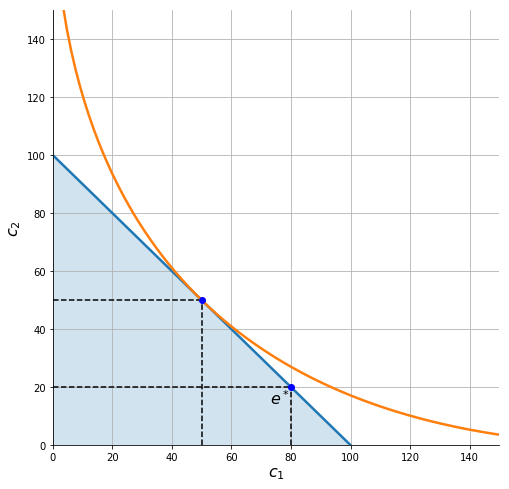

In [7]:
cons_plot(r, delta, alpha, e1, e2)

### 4.1 Borrowing
If the consumer borrows in period 1, we have the case where:   $s_1^* = e_1 - c_1^* <0$.

If we let $e_1=50$ and $c=80$, whilse again assuming $r=0$ and $\delta=0$, then consumption, endowment and savings is given as:

In [8]:
e1,e2 = 20,80
# Allocation with borrowing
allocation()

,Consumption,Endowment,Saving
Period 1,50.0,20,-30.0
Period2,50.0,80,0.0


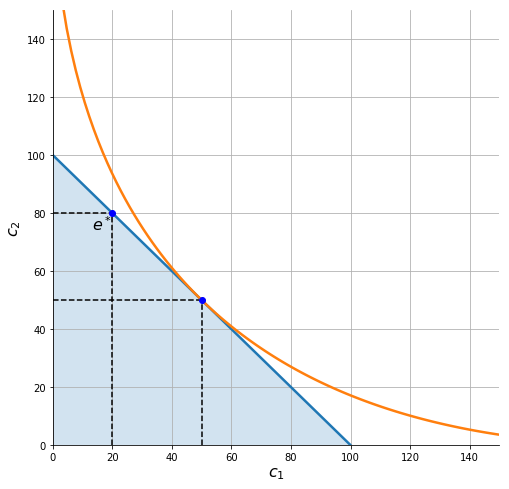

In [9]:
cons_plot(r, delta, alpha, e1, e2)

## 5. Conclusion: The effect of interest rate and time-preference on consumption
We will now turn our attention on how consumption allocation and utility is affected by $r$ and $\rho$.

From the expression: $c_2^* = \left [\delta (1+r) \right]^\frac{1}{\alpha}c_1^* $,  we get that an increase in $\rho$, causes a decrease in $\delta$. A decrease in $\delta$, will then cause a decrease in $c_2^*$, and conversely an increase in $c_1^*$. $\rho$ thus acts as a discount factor on utility, meaning an increse in rho causes consumer preference to change, such that the value consumption now, more than future consumption.

The interest rate, $r$, then has the opposite effect. An increase in $r$, will cause the consumer to save more, as this will increase $c_2$, due to the interest that will be received on savings. In other words, consumption in period one, becomes more expensive compared to consumption in period 2. This affects the budget constraint.

This means that the decision to save or borrow, depends on the parameters $r$ anf $\rho$. The intuition behind this is simple, if $\rho < r$, then the marginal benefit of consuming now, is less than the marginal benefit of saving for future consumption, thud the consumer will sacrifice consumption the first period, in order to consume more in second period and vice versa. We can summarize this as follows:
* If $\rho < r \Rightarrow u'(c_1) > u'(c_2)$ in other words, $c_1 < c_2$
* If $\rho > r \Rightarrow u'(c_1) < u'(c_2)$ in other words, $c_1 > c_2$

The ineractive plot below, provides as a usefull tool to understanding this. The plot can show how changes in $r$ and $delta$ respectively, affects utillity and the budget constraint. Also, it shows that when $\rho < r$ then $c_1 < c_2$ and vice versa.

In [7]:
interact(cons_plot, r=(rmin,rmax,0.1), alpha=fixed(alpha), delta=(0.5,1,0.1), e1=(10,100,1), e2=(10,100,1));

interactive(children=(FloatSlider(value=0.0, description='r', max=1.0), FloatSlider(value=0.7, description='de…